In [38]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [2]:
df=pd.read_csv("./rock_density_xray.csv")
df.columns=["Signal","Density"]
X=df["Signal"]
y=df["Density"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
def runModel(model):
    model.fit(X_train.values.reshape(-1,1),y_train)
    predictions=model.predict(X_test.values.reshape(-1,1))
    print("MAE",mean_absolute_error(y_test,predictions))
    print("MSE",mean_squared_error(y_test,predictions))
    
    x_plot=np.arange(1,100)
    y_plot=model.predict(x_plot.reshape(-1,1))
    sbn.scatterplot(data=df,x="Signal",y="Density")
    plt.plot(x_plot,y_plot,color="red")


    
    

MAE 0.1206619084399996
MSE 0.027914294906070468


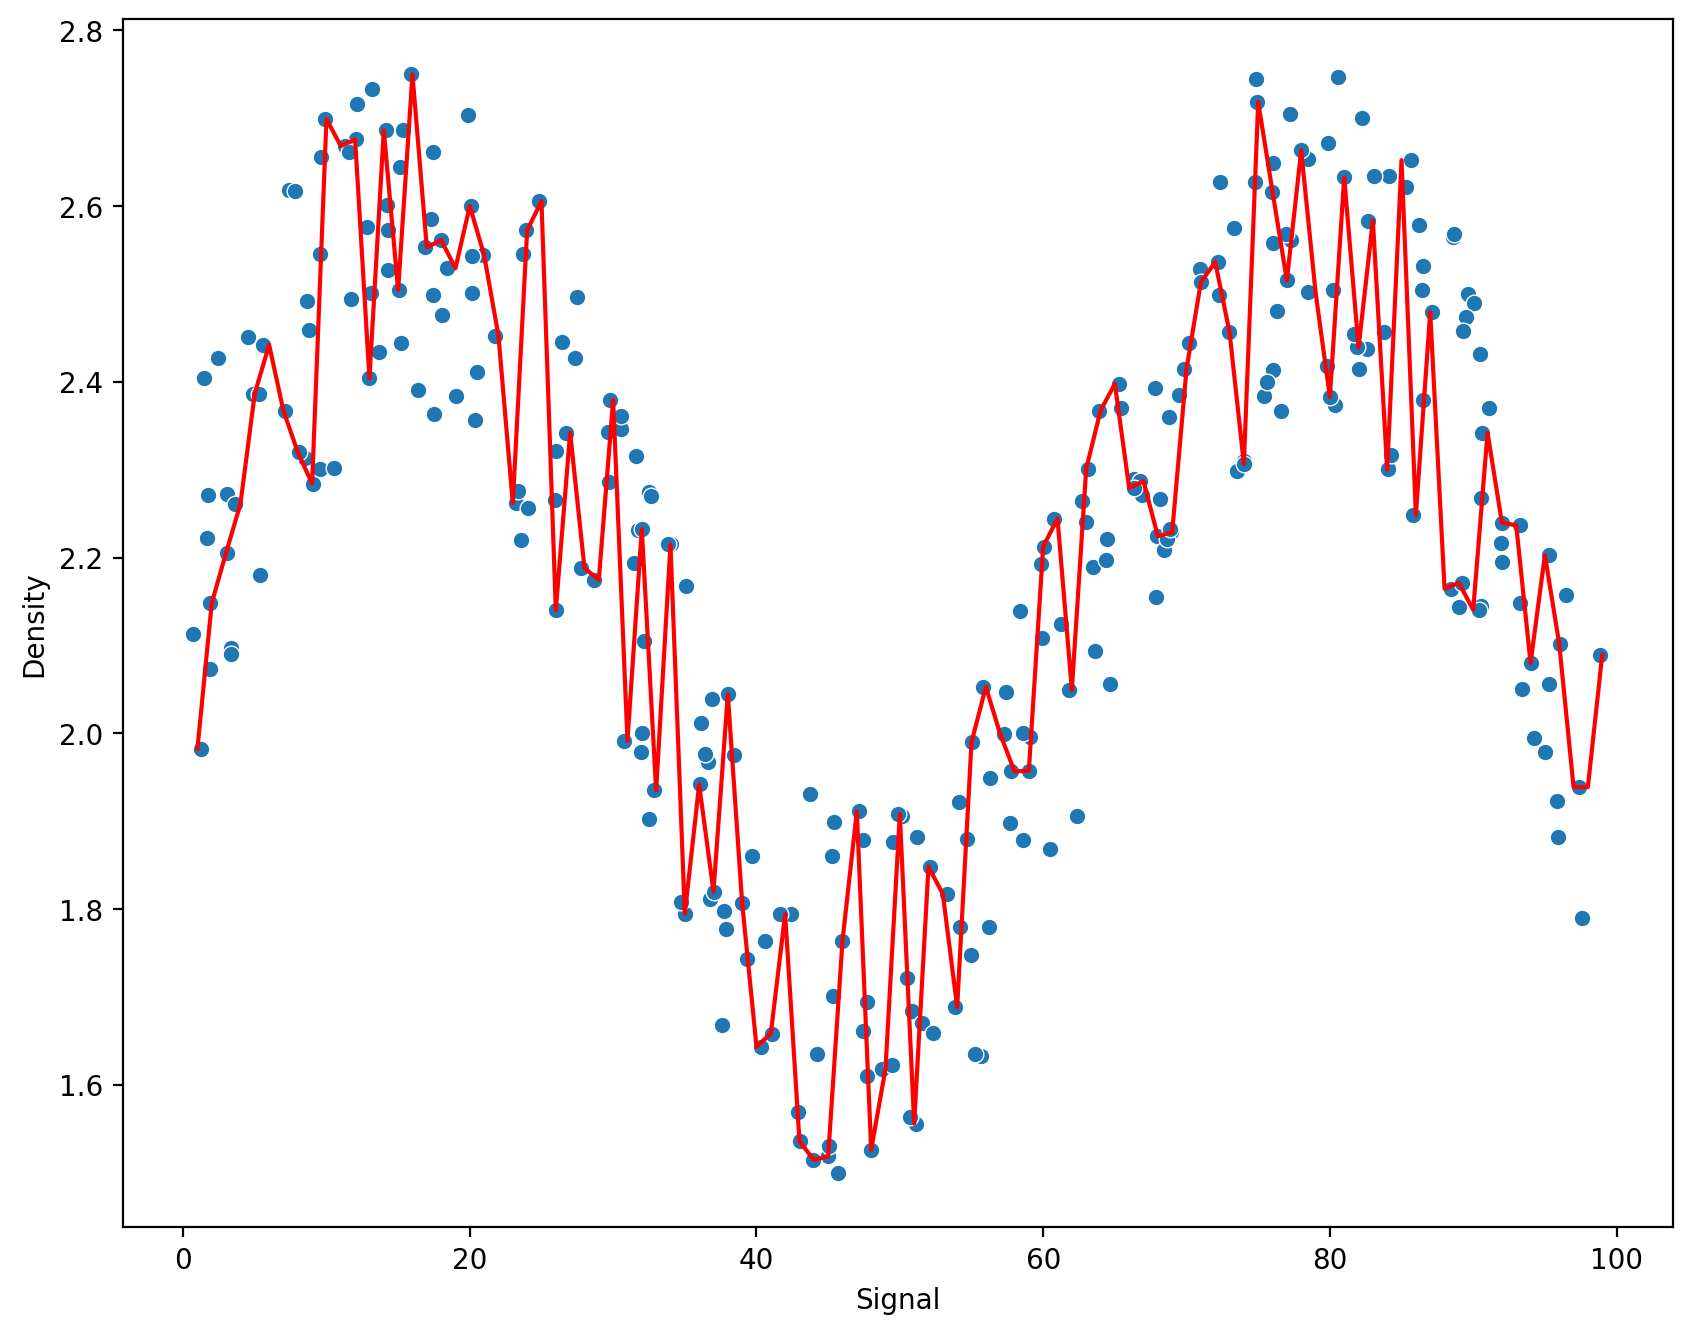

In [19]:
plt.figure(figsize=(10,8),dpi=200)
model=KNeighborsRegressor(n_neighbors=1)
model.fit(X_train.values.reshape(-1,1),y_train)
runModel(model);

MAE 0.13010617319422033
MSE 0.023728859331028737


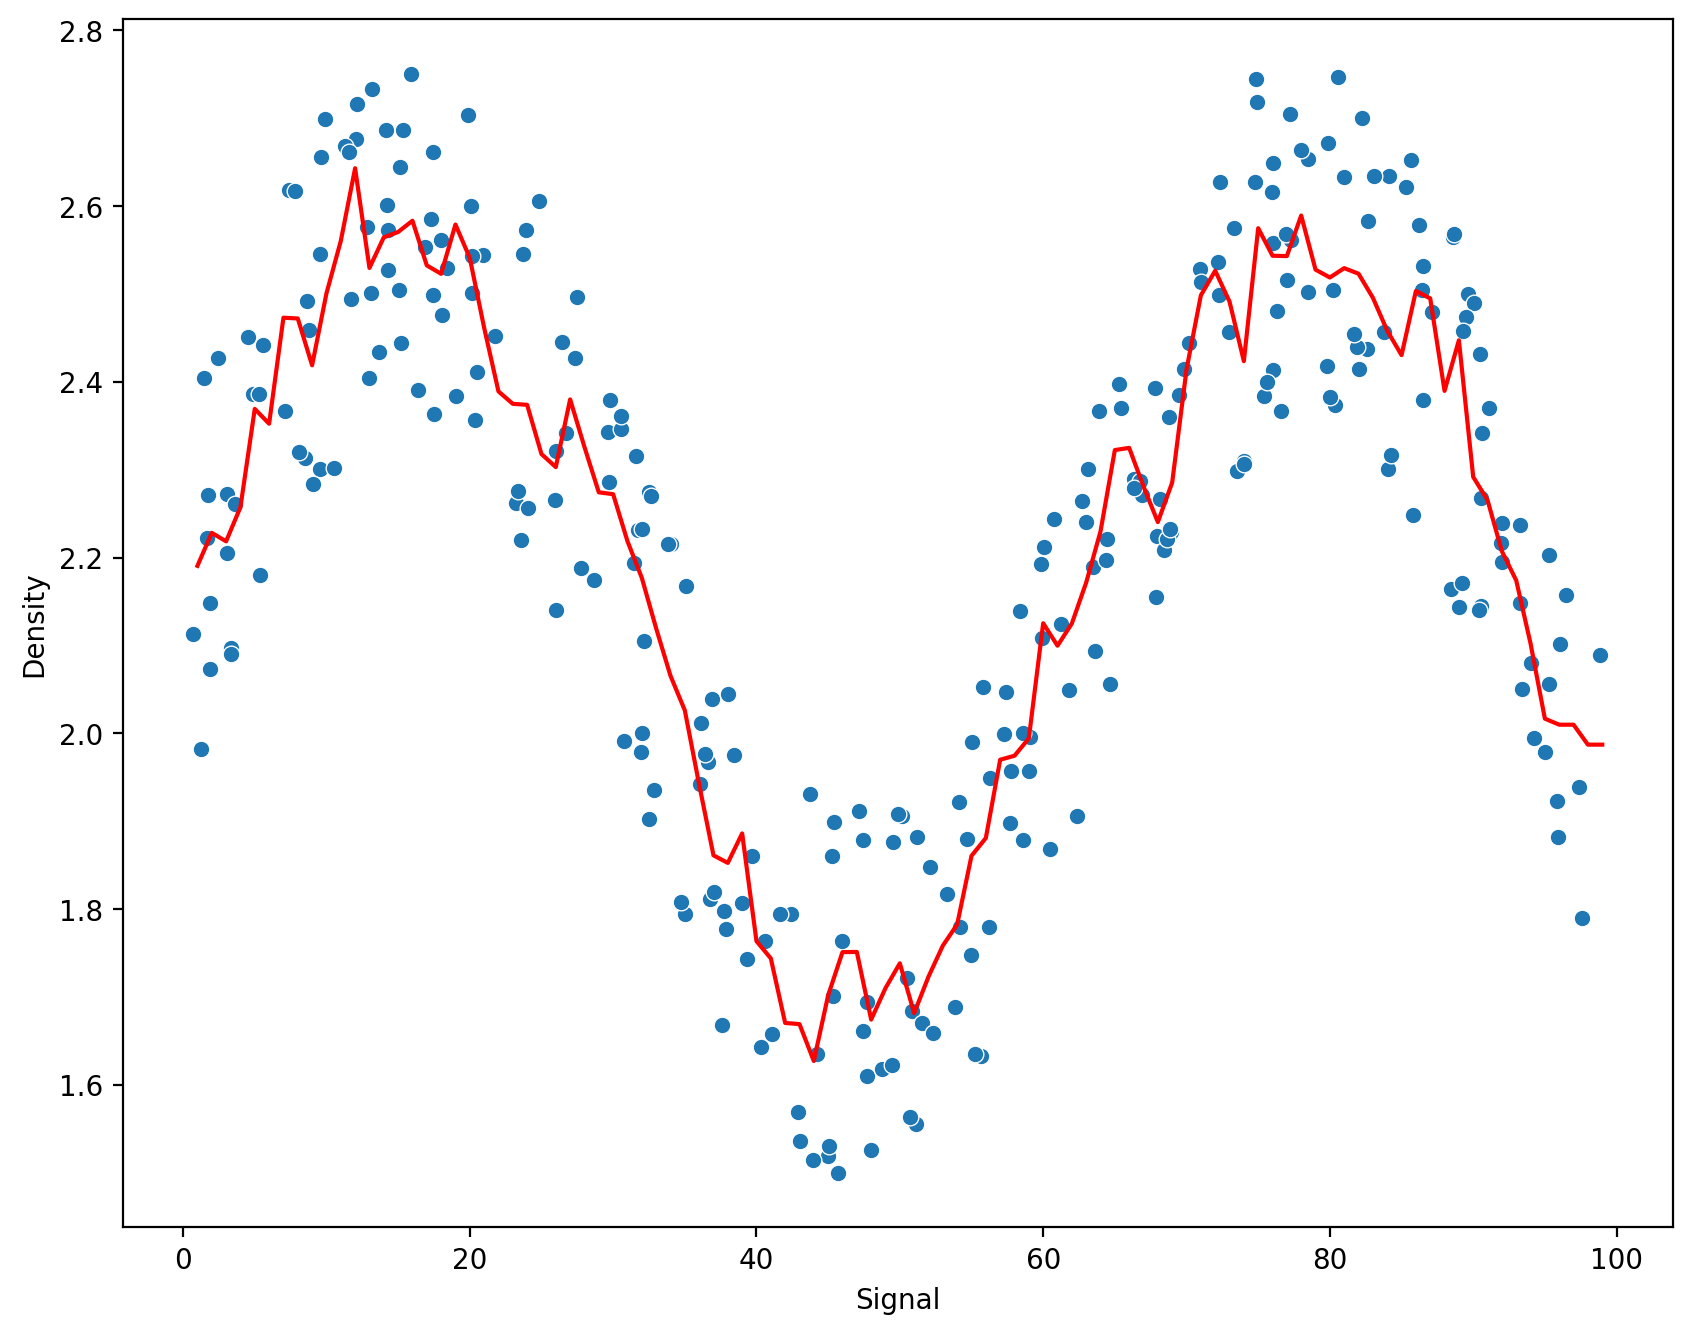

In [21]:
plt.figure(figsize=(10,8),dpi=200)
model=KNeighborsRegressor(n_neighbors=5)
model.fit(X_train.values.reshape(-1,1),y_train)
runModel(model);

MAE 0.1206619084399996
MSE 0.027914294906070468


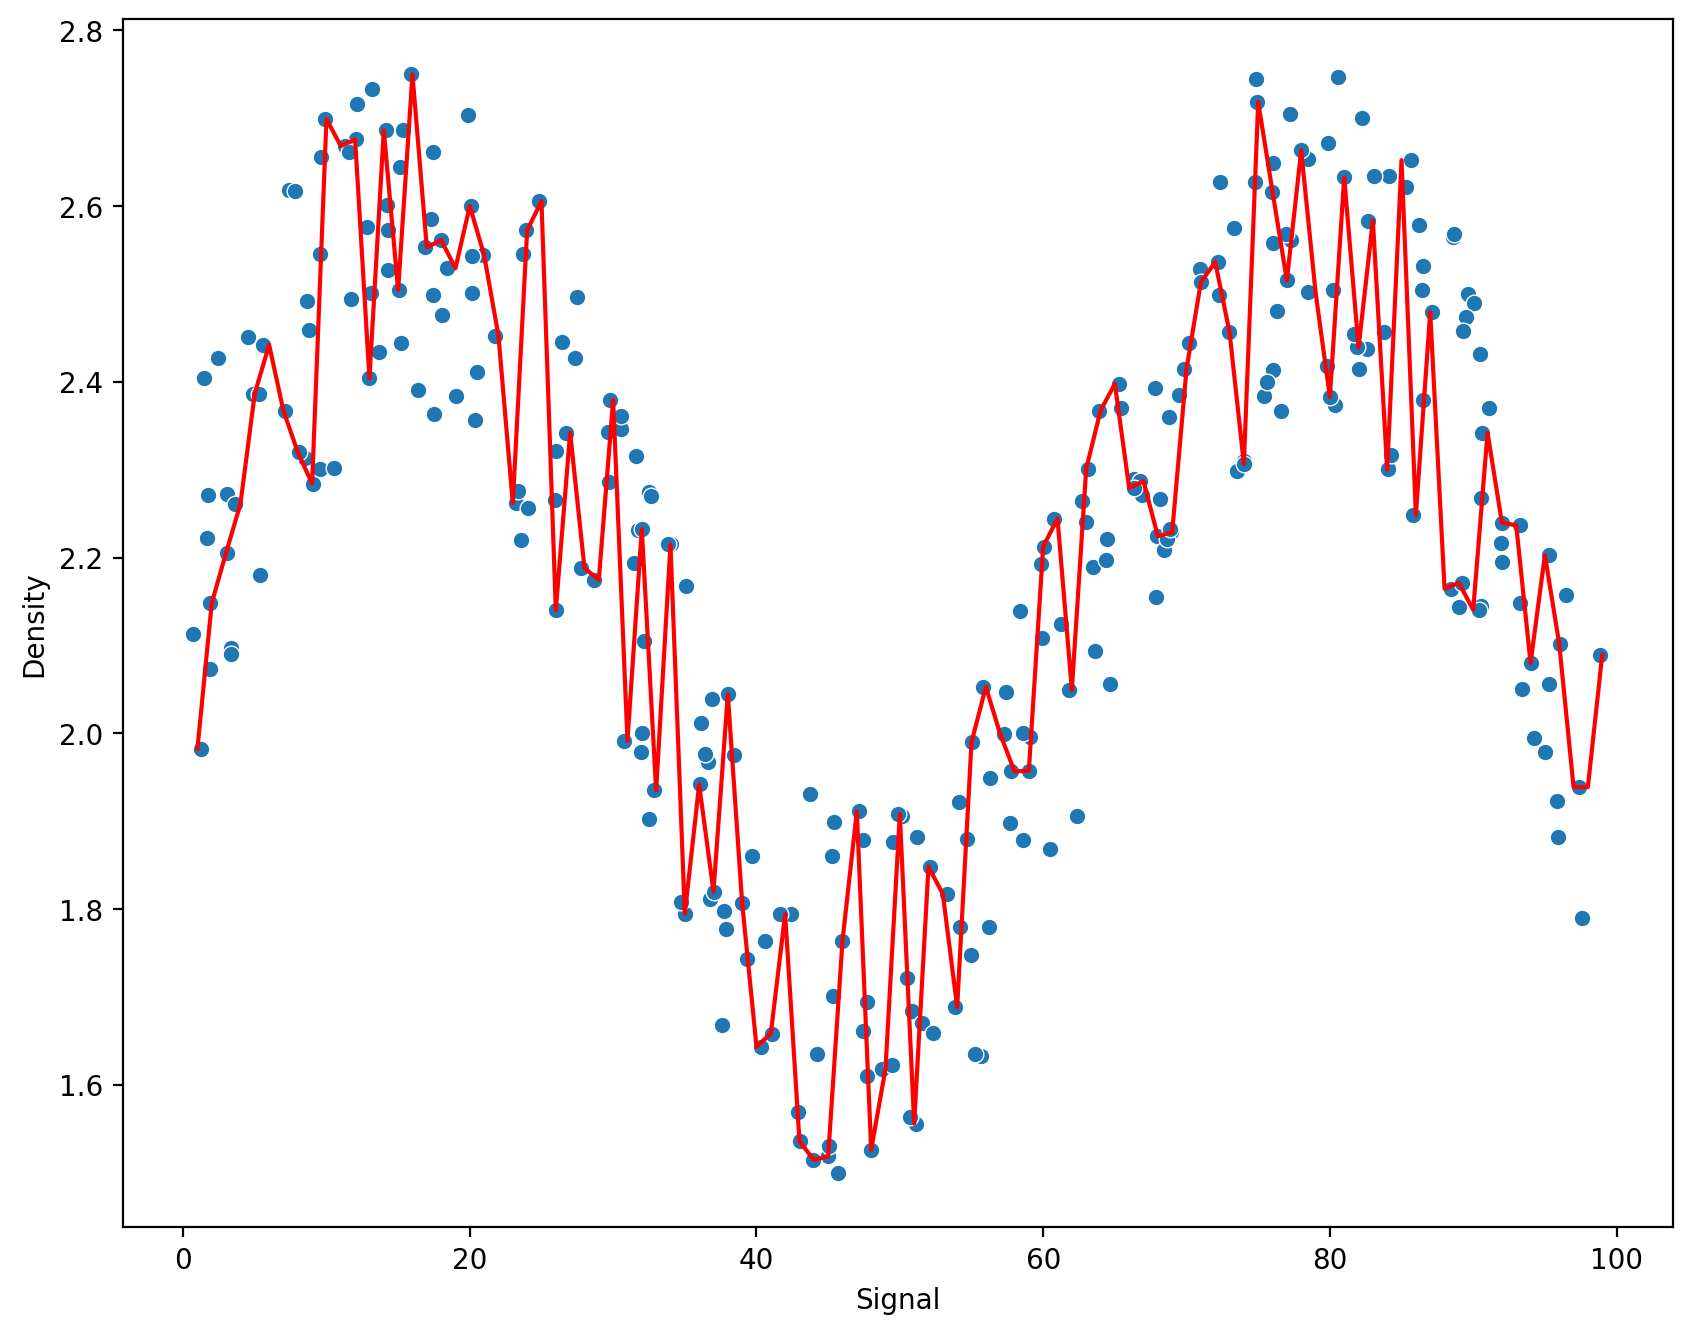

In [23]:
plt.figure(figsize=(10,8),dpi=200)
model=DecisionTreeRegressor()
model.fit(X_train.values.reshape(-1,1),y_train)
runModel(model);

MAE 0.12816587955834147
MSE 0.020327196015750258


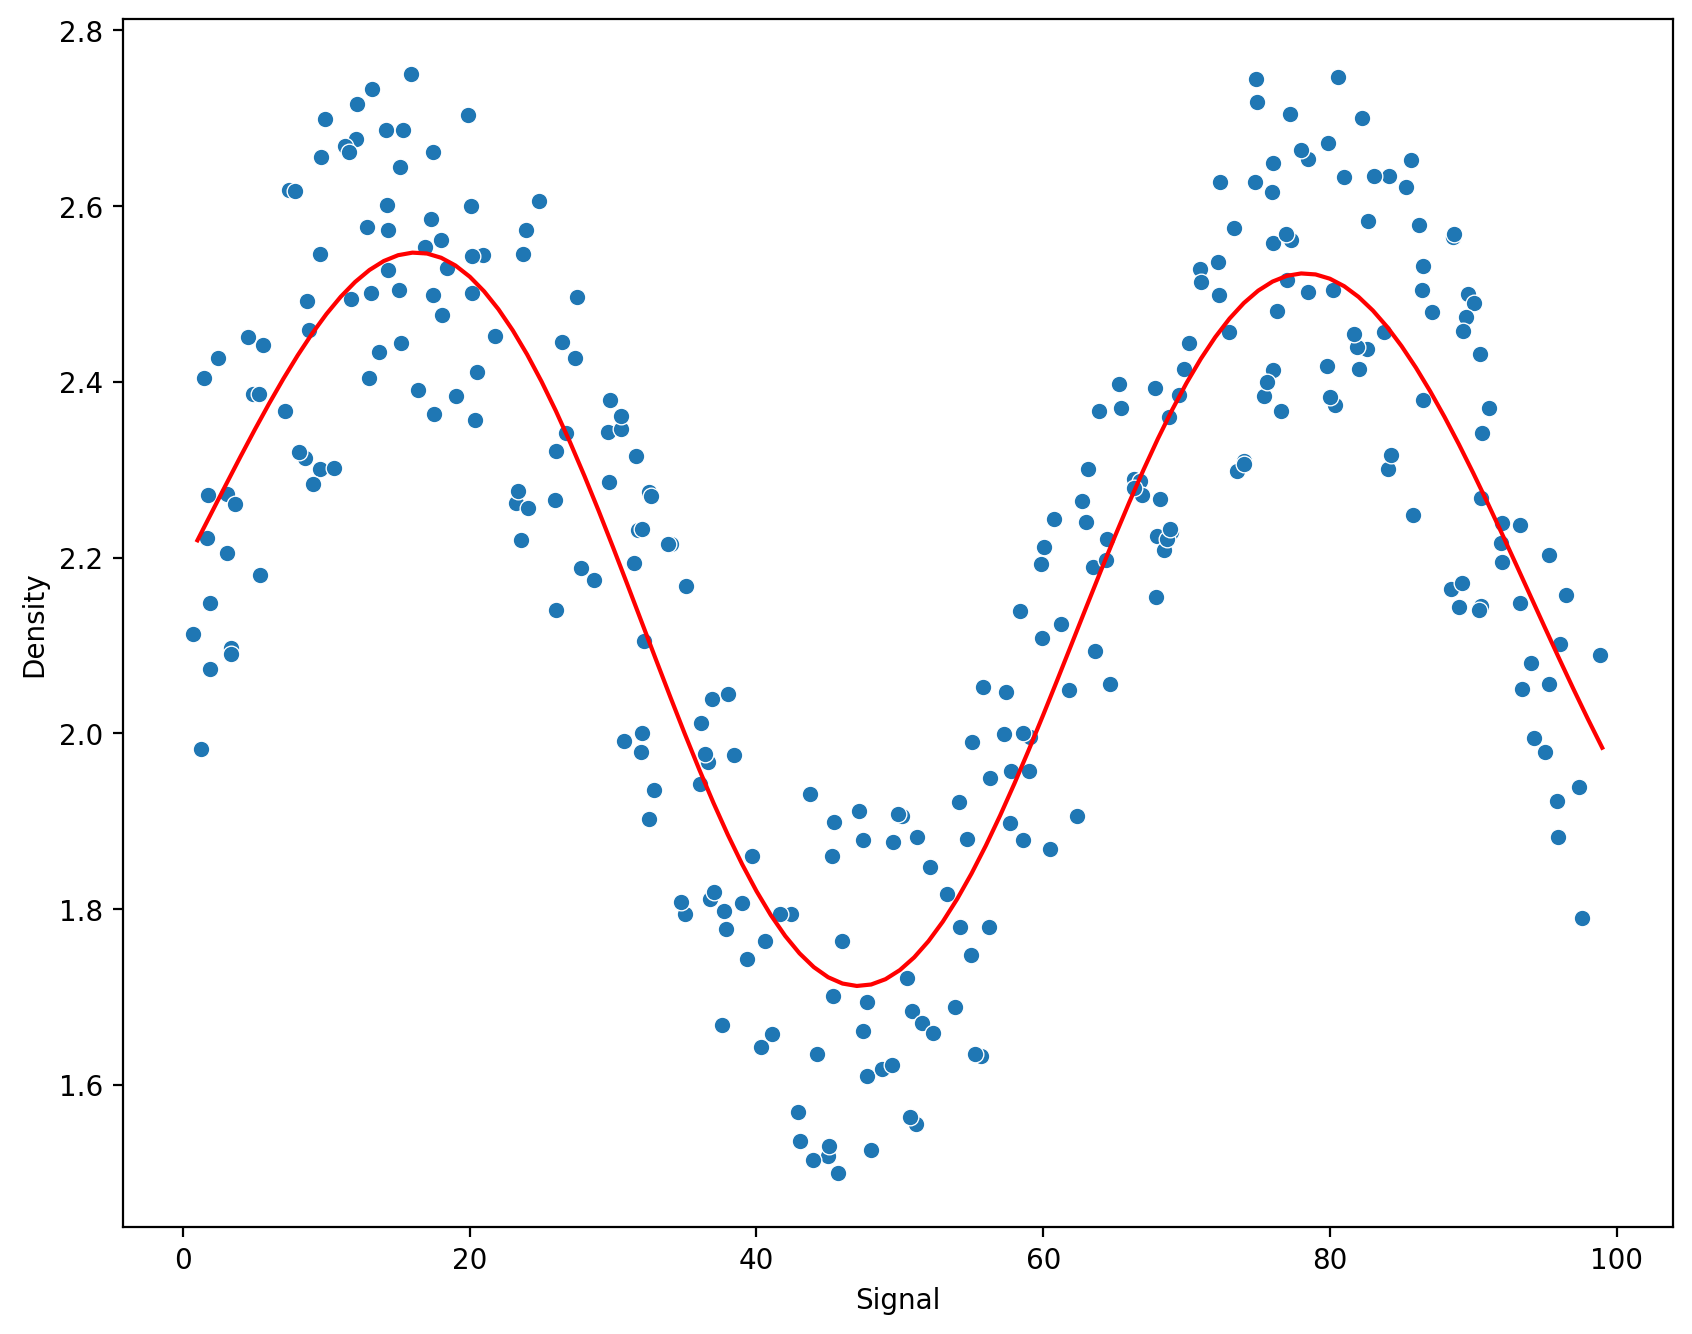

In [33]:
plt.figure(figsize=(10,8),dpi=200)
param_grid={"C":[0.01,0.1,0.5,0.9,1,10,20,100,1000],"gamma":["auto","scale"]}
model=SVR()
grid=GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train.values.reshape(-1,1),y_train)
runModel(grid);


MAE 0.11978431616094416
MSE 0.021455652576381216


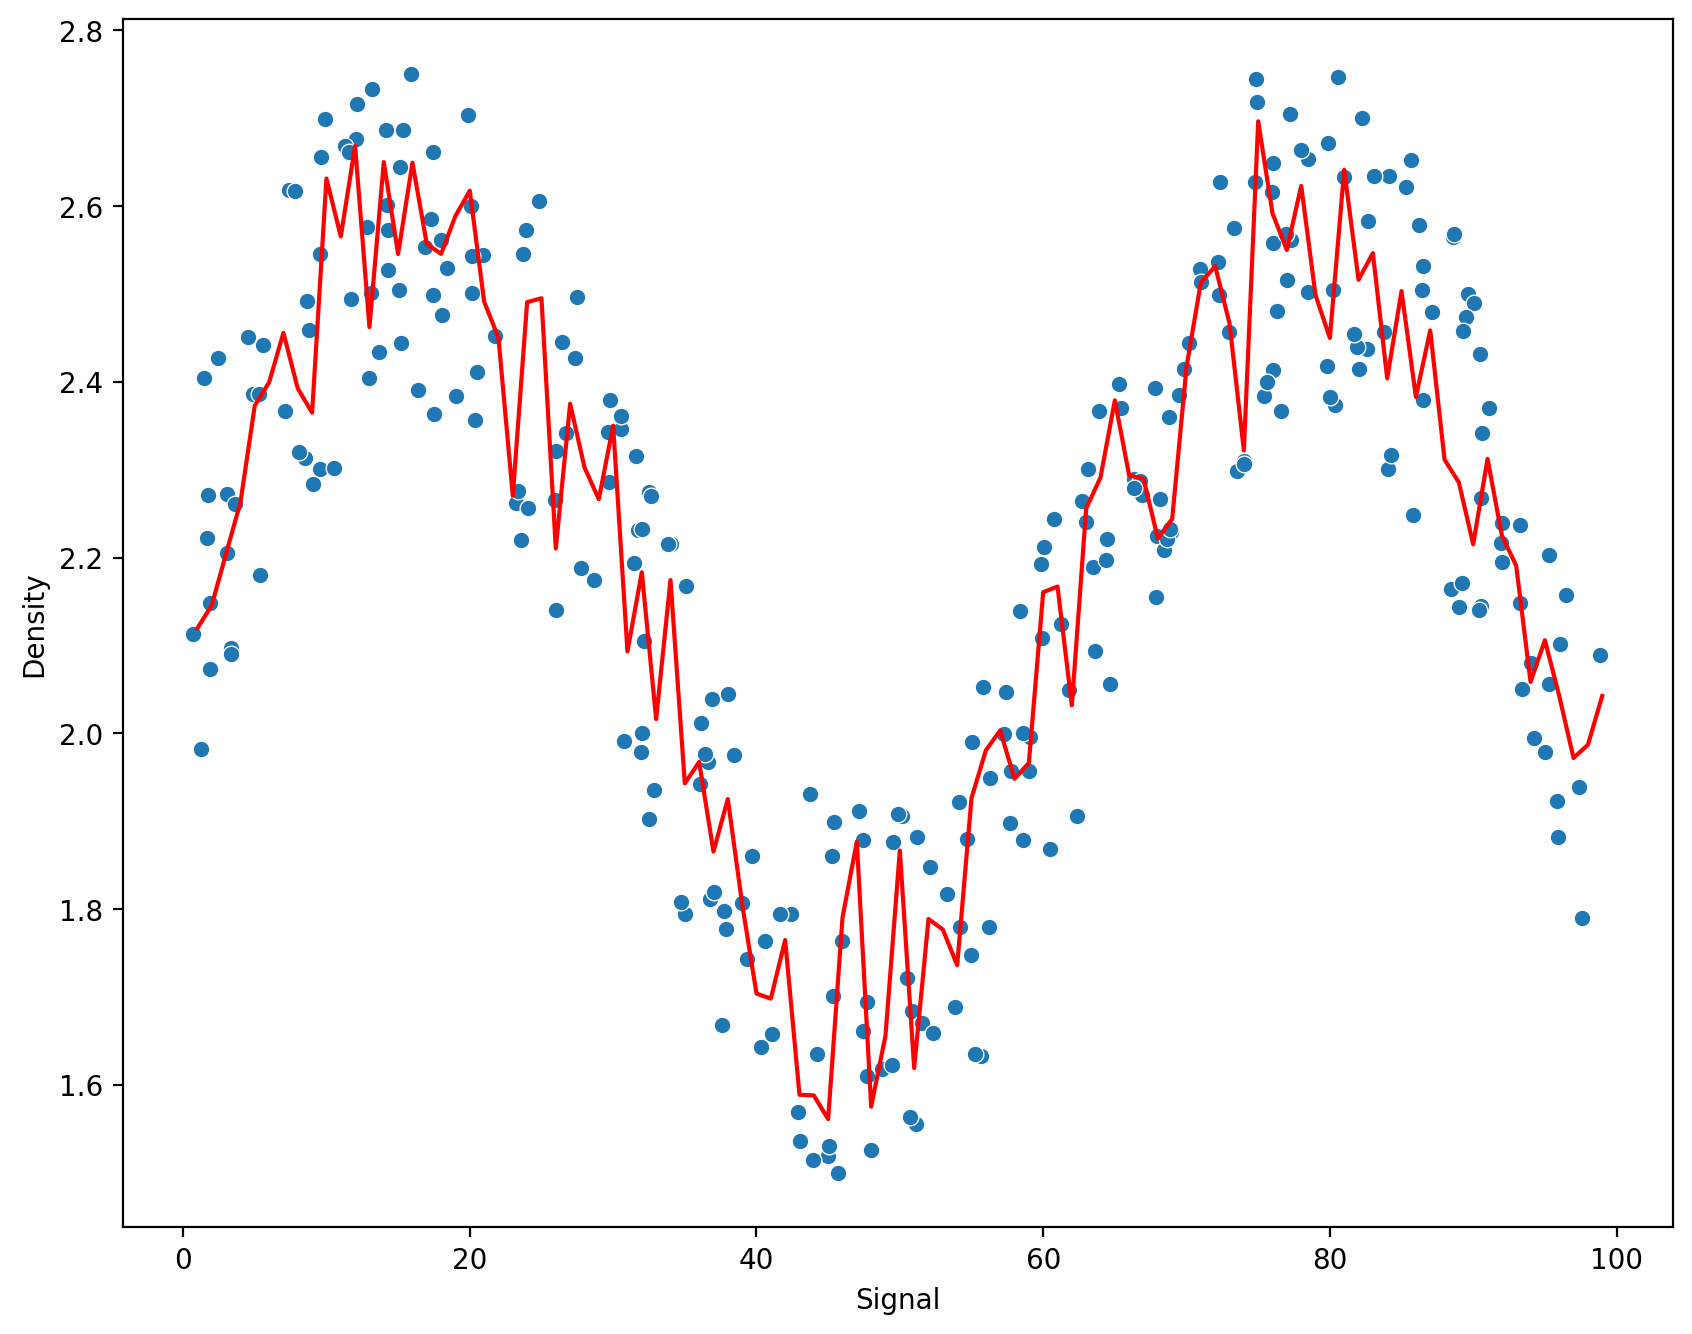

In [37]:
plt.figure(figsize=(10,8),dpi=200)
param_grid={"n_estimators":[1,10,20,30,100,200]}
model=RandomForestRegressor()
grid=GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train.values.reshape(-1,1),y_train)
runModel(grid);

MAE 0.1208819248378294
MSE 0.022058132028765942


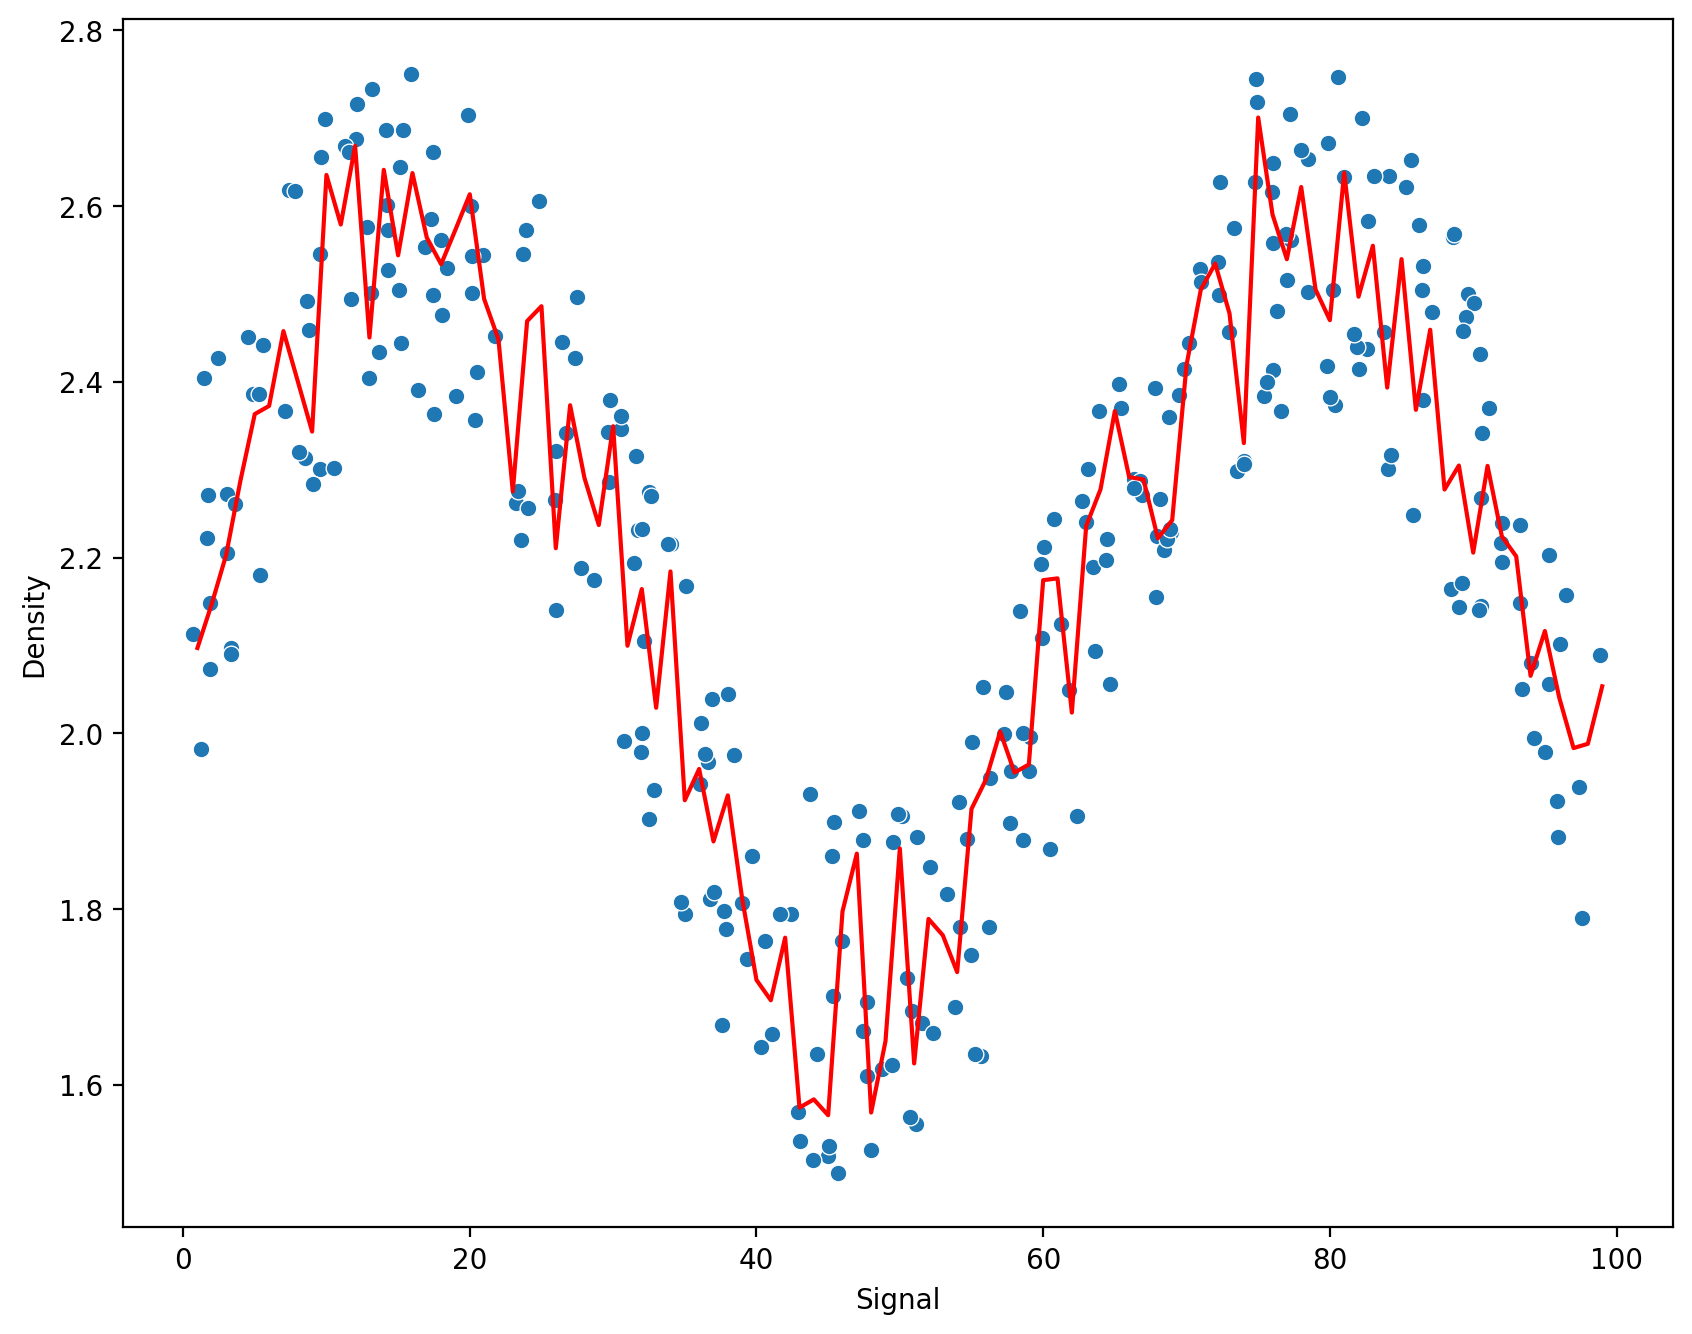

In [40]:
plt.figure(figsize=(10,8),dpi=200)
model=AdaBoostRegressor()
model.fit(X_train.values.reshape(-1,1),y_train)
runModel(grid);

MAE 0.11582591421967606
MSE 0.020777656445617798


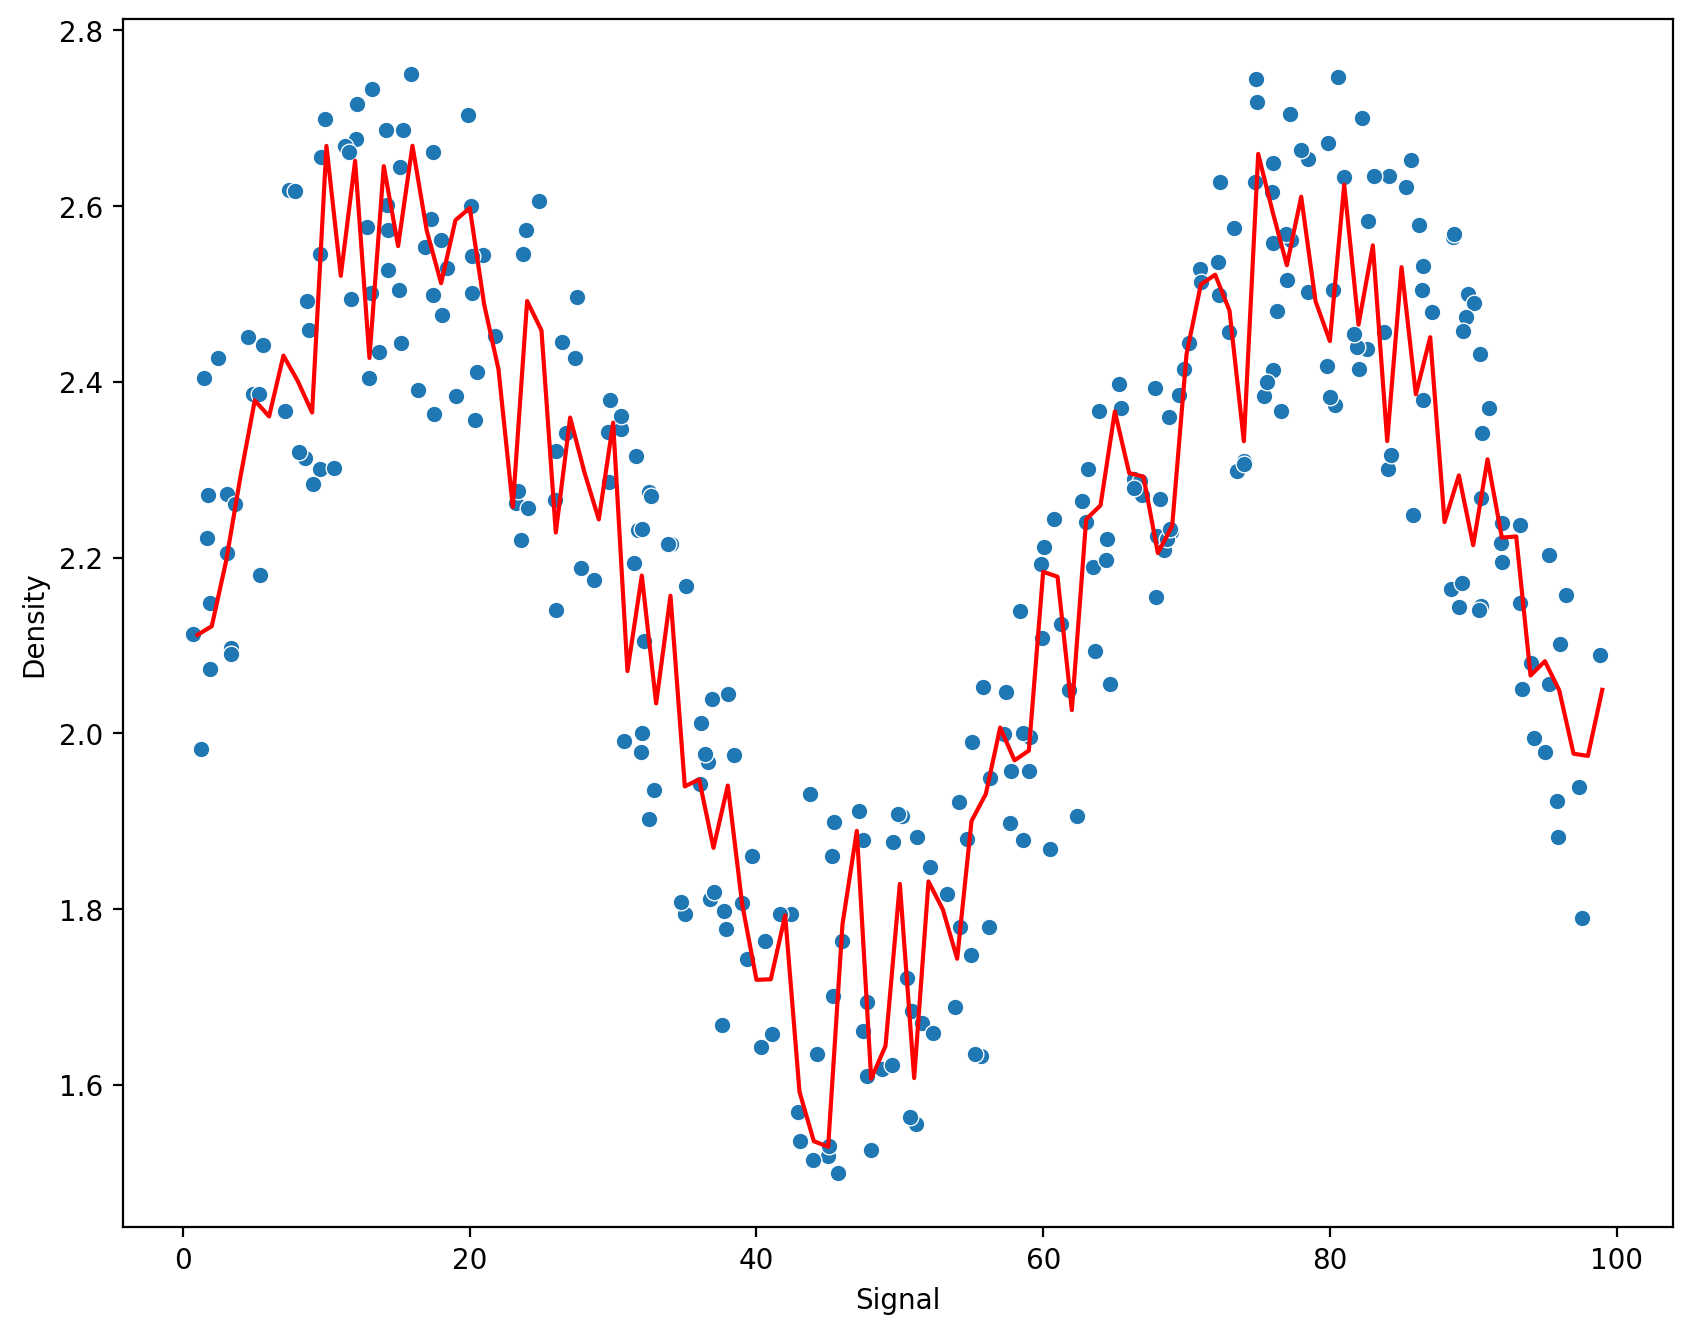

In [41]:
plt.figure(figsize=(10,8),dpi=200)
model=GradientBoostingRegressor()
model.fit(X_train.values.reshape(-1,1),y_train)
runModel(grid);